In [1]:
import sys
import random
import pandas as pd
#pd.options.display.max_rows = 2000
#pd.options.display.max_columns = 2000

from datetime import datetime
from datetime import timedelta  

import numpy as np
#np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_excel('Dropex-Wardenine-Final_fake.xlsx')
# df['Date_year'] = df['Date'].dt.year
# df['Date_month'] = df['Date'].dt.month
# df['Date_week'] = df['Date'].dt.week
# df['Date_day'] = df['Date'].dt.day
# df['Date_hour'] = df['Date'].dt.hour
# df['Date_minute'] = df['Date'].dt.minute
# df['Date_dayofweek'] = df['Date'].dt.dayofweek

# df['Arr_year'] = df['Date arrivée'].dt.year
# df['Arr_month'] = df['Date arrivée'].dt.month
# df['Arr_week'] = df['Date arrivée'].dt.week
# df['Arr_day'] = df['Date arrivée'].dt.day
# df['Arr_hour'] = df['Date arrivée'].dt.hour
# df['Arr_minute'] = df['Date arrivée'].dt.minute
# df['Arr_dayofweek'] = df['Date arrivée'].dt.dayofweek

df['delta_days'] = (df['Date arrivée']-df['Date']).dt.total_seconds()/(60*60*24)

enc_gov = LabelEncoder()
df['Governorate_nb']=enc_gov.fit_transform(df['Governorate'])
df['original_delta_days']=df['delta_days']


In [3]:

X=df[['COD','Governorate_nb']]
print(X)
enc_days = LabelEncoder()

df['delta_days']=enc_days.fit_transform(df['delta_days'])

y=df['delta_days']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=51)
df

       COD  Governorate_nb
0     52.0              12
1     92.0              13
2     37.0              22
3     37.0              19
4     52.0              12
...    ...             ...
1527  42.0              22
1528  77.0              22
1529  42.0              16
1530  20.0              15
1531  42.0               7

[1532 rows x 2 columns]


,Refernce,Date,Name,Address,Mobile,COD,Governorate,Remarque,Date arrivée,delta_days,Governorate_nb,original_delta_days
0,619001000000,2021-05-06 14:51:00,karim bounawas,avenue 2 mars a cote du CNAM 5199,90121252,52.0,Mahdia,Fragile,2021-05-07 14:51:00,0,12,1.0
1,619001000000,2021-05-06 15:22:00,meriem khfacha,rue 2 sidi sore swani,50827222,92.0,Monastir,NaN,2021-05-07 15:22:00,0,13,1.0
2,619001000000,2021-05-08 12:48:00,naima mami,9 rue oued zroud sidi abdelaziz la marsa,99331225,37.0,Tunis,AnnulÃ© par destinataire,2021-05-10 12:48:00,1,22,2.0
3,619001000000,2021-05-08 12:49:00,mayssa mhiri,hammem sousse,26329652,37.0,Sousse,NaN,2021-05-09 12:49:00,0,19,1.0
4,619001000000,2021-05-08 12:51:00,ines alouane,sidi alouane Mahdia,50011004,52.0,Mahdia,NaN,2021-05-09 12:51:00,0,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1527,619001000000,2022-01-13 13:03:00,khaoula ben amor,47 rue du parc,50391391,42.0,Tunis,fragiiilllleeeeeee,2022-01-14 13:03:00,0,22,1.0
1528,619001000000,2022-01-14 13:08:00,jihene tajine,17 rue moutanabi khaznadar pres de bardo,23622572,77.0,Tunis,fragillleeeeeee,2022-01-15 13:08:00,0,22,1.0
1529,619001000000,2022-01-14 13:10:00,safa masmoudi,route aeroport km1 sfax,27034441,42.0,Sfax,fragiilleeeeeeeee,2022-01-15 13:10:00,0,16,1.0
1530,619001000000,2022-01-14 13:12:00,sana benna,chara3 hadi cheker,27440468,20.0,Nabeul,fragilllleeeeeeeeeee,2022-01-16 13:12:00,1,15,2.0


In [4]:
RFC=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=51)
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
accuracy_score(y_test,pred)




0.8766233766233766

84.23629242819844
1532
0.054984525083680444


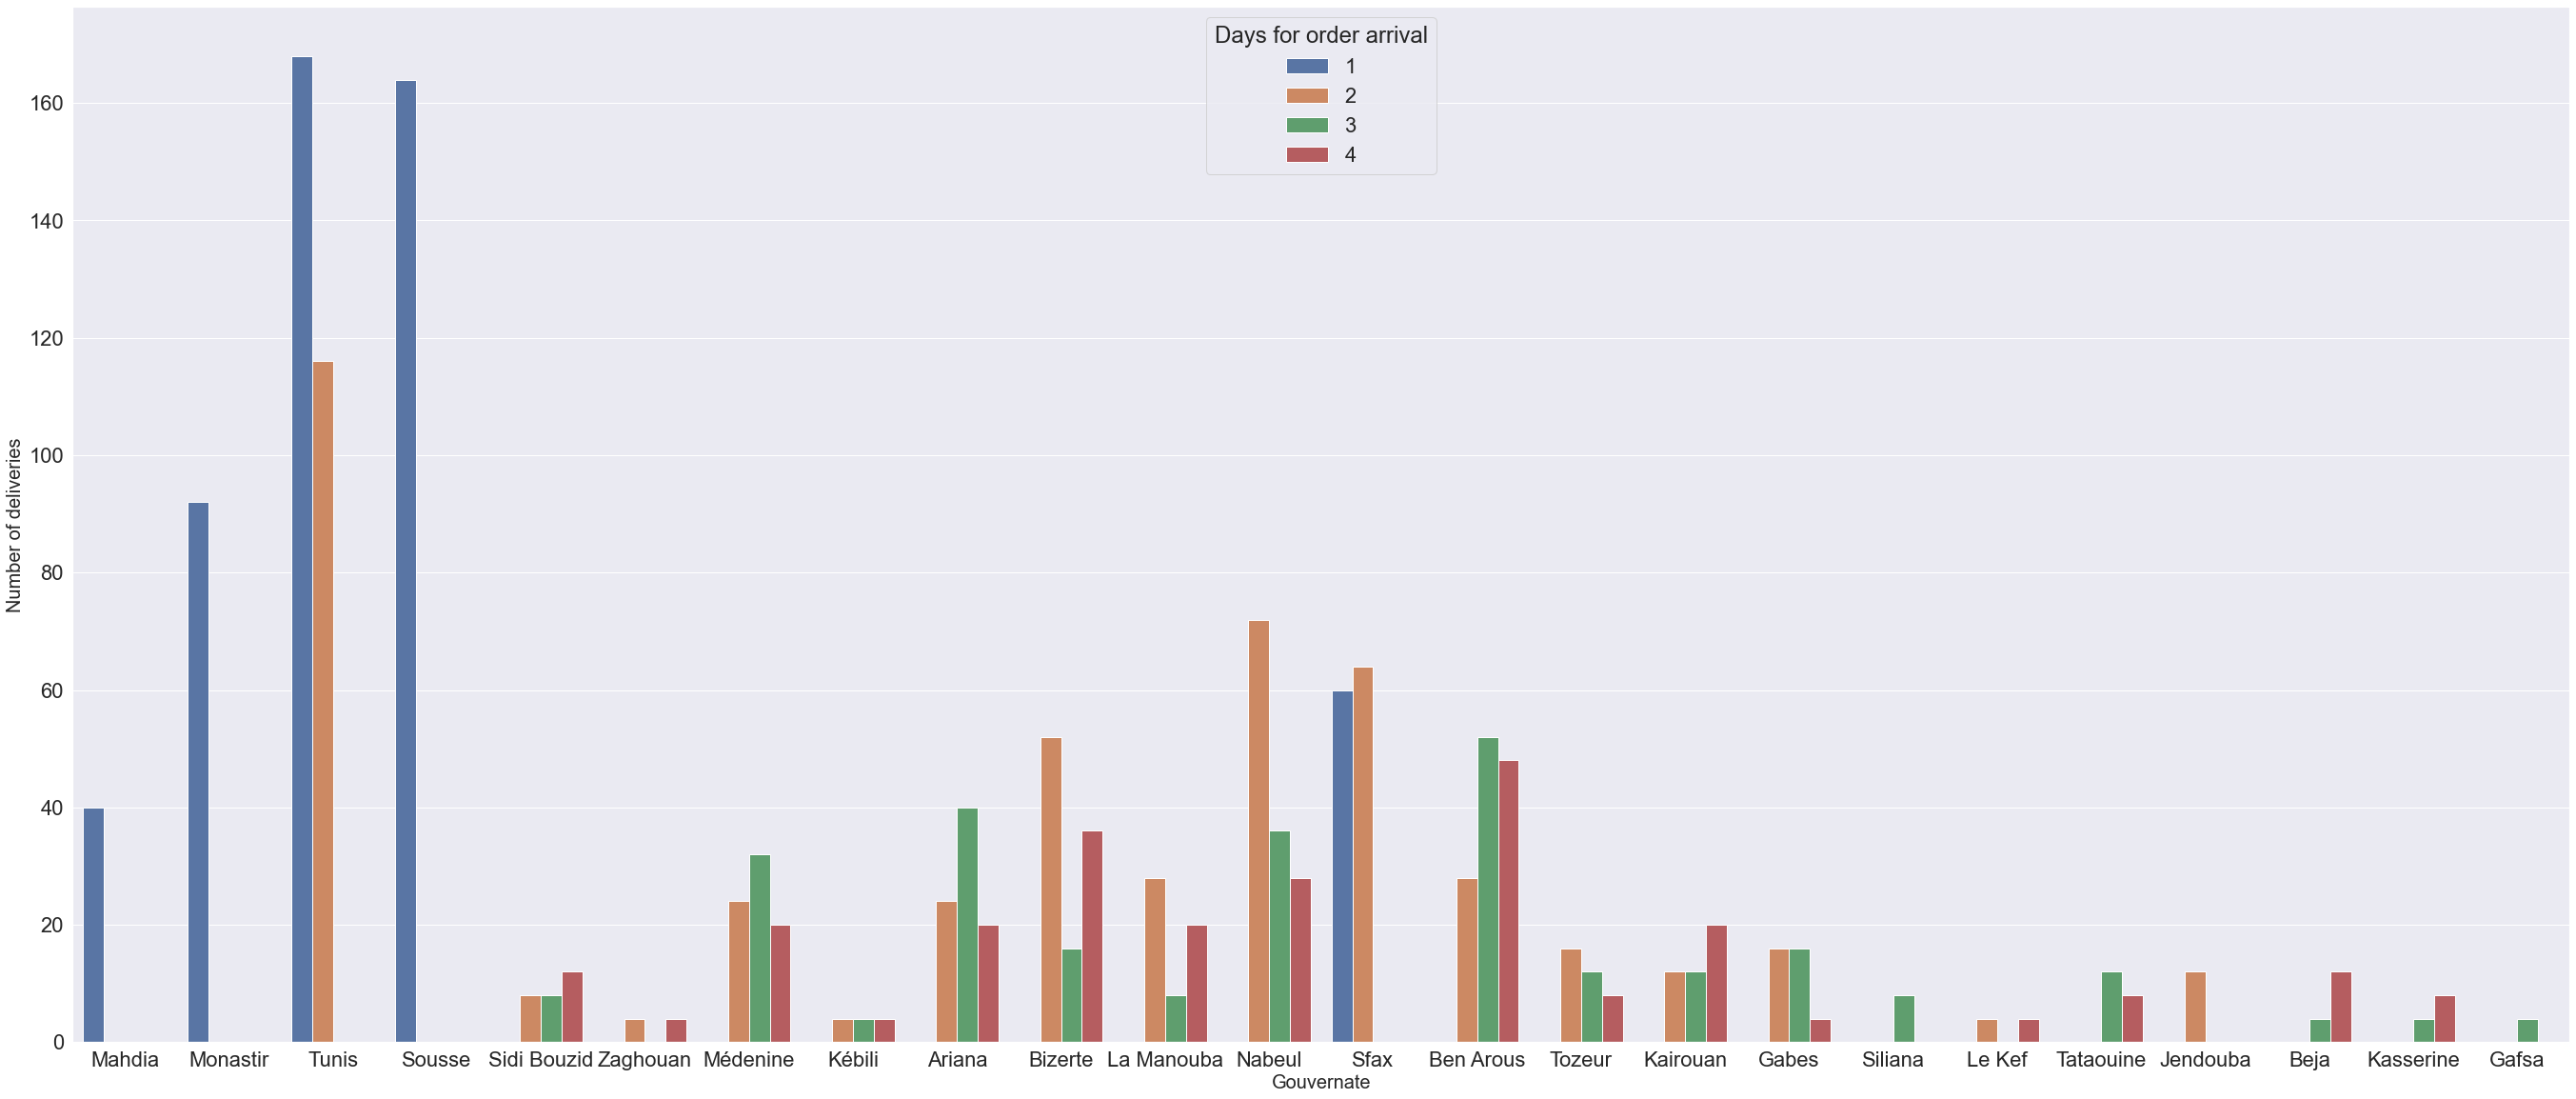

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(rc = {'figure.figsize':(47,20)})
# sns.countplot(x="Governorate",data=dx)
sns.set(font_scale = 2)
p = sns.countplot(x="Governorate",hue="original_delta_days",data=df)
p.set_xlabel("Gouvernate", fontsize = 20)
p.set_ylabel("Number of deliveries", fontsize = 20)
plt.legend(title='Days for order arrival',labels=['1', '2','3','4'])
df2 = df["COD"].mean()
print(df2)
print(len(df))
print(df2/len(df))


Text(0, 0.5, 'Order price (DT)')

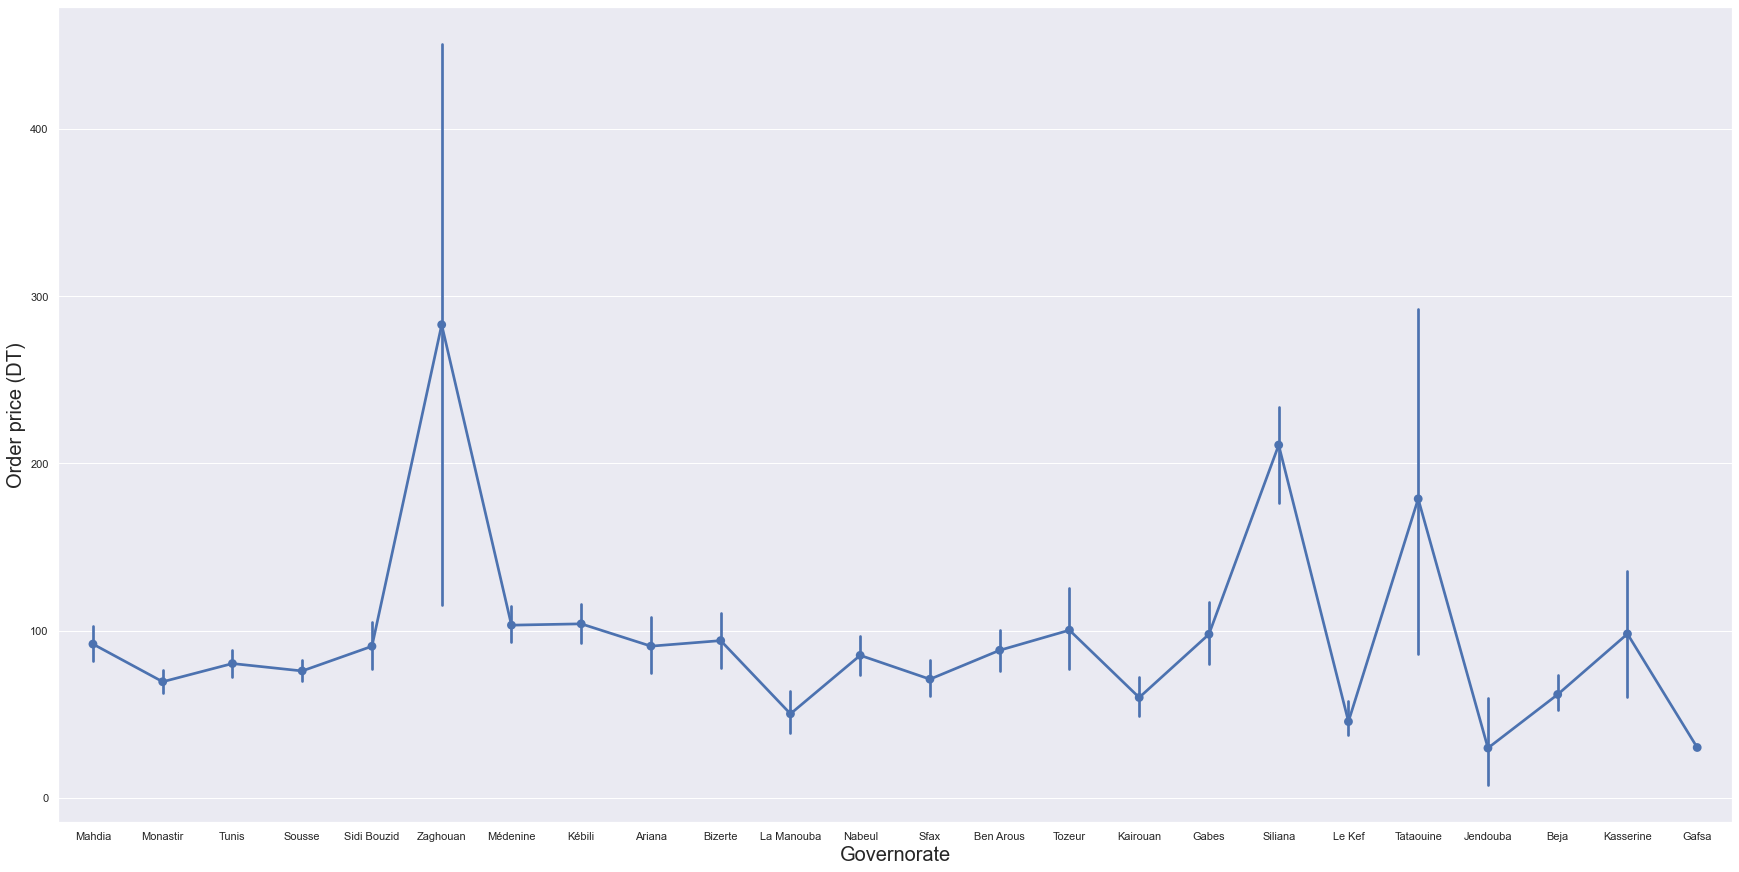

In [25]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,15)})

sns.set_theme(style="darkgrid")

ax = sns.pointplot(x="Governorate", y="COD", data=df)
ax.set_xlabel("Governorate", fontsize = 20)
ax.set_ylabel("Order price (DT)", fontsize = 20)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions= model.predict(X_test)
accuracy_score(y_test,predictions)


0.8766233766233766

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
#Supervised Learning Estimators

#Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#KNN
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
#Unsupervised Learning Estimators

#Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

#K Means

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)

In [9]:
#Model Fitting | Supervised learning

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
gnb.fit(X_train, y_train)

#Model Fitting | Unsupervised learning

k_means.fit(X_train)
pca_model = pca.fit_transform(X_train)

In [10]:
y_pred_svc = svc.predict(X_test)
y_pred_gnb=gnb.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict_proba(X_test)
y_pred = k_means.predict(X_test)



In [11]:
k_means.fit(X_train)
y_pred = k_means.predict(X_test)
accuracy_score(y_test, y_pred)

0.2662337662337662

In [12]:
enc_days.inverse_transform(df['delta_days'])



array([1., 1., 2., ..., 1., 2., 3.])

In [13]:
enc_gov.inverse_transform(df['Governorate_nb'])

array(['Mahdia', 'Monastir', 'Tunis', ..., 'Sfax', 'Nabeul', 'Kairouan'],
      dtype=object)

In [14]:
val = input("Enter your Governorate : ")

options = {"Ariana" :0 ,
           "Beja" :1 ,
           "Ben Arous" :2 ,
           "Bizerte" :3 ,
           "Gabes" :4 ,
           "Gafsa" :5 ,
           "Jendouba" :6 ,
           "Kairouan" :7 ,
           "Tunis" :22 ,
           "Zaghouan" :23 ,
           "Kasserine" :8 ,
           "Kébili" :9 ,
           "Le Kef" :11 ,
           "Mahdia" :12,
           "La Manouba" :10 ,
           "Médenine" :14 ,
           "Monastir" :13 ,
           "Nabeul" :15 ,
           "Sfax" :16 ,
          "Sidi Bouzid" :17,
           "Siliana" :18 ,
           "Sousse" :19 ,
           "Tataouine" :20 ,
           "Tozeur" :21 }

gov=options[val]
val_cod = input("Enter your order's price : ")
test=RFC.predict([ [val_cod,gov] ])
print(int(test[0]))

value = random.uniform(0,4)
print(value)
print (datetime.now() + timedelta(days=int(test[0])+1,hours=value))






Enter your Governorate : 45


KeyError: '45'